In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf



train , validation = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/images",
                                                                 labels="inferred",
                                                                 label_mode="int",
                                                                 validation_split=0.2,
                                                                 image_size = (224,224),
                                                                 seed=23,
                                                                 color_mode="rgb",
                                                                 subset="both")

Found 10933 files belonging to 101 classes.
Using 8747 files for training.
Using 2186 files for validation.


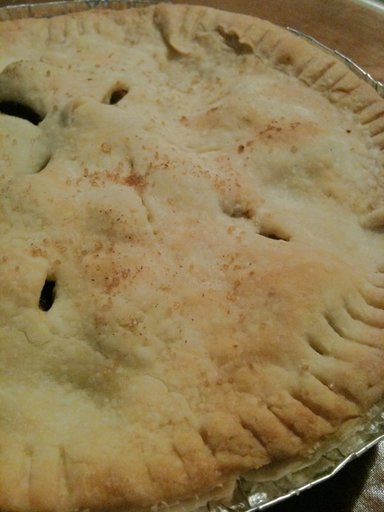

In [3]:
sample = cv2.imread('/content/drive/MyDrive/images/apple_pie/101251.jpg')
display = cv2_imshow(sample)

In [4]:
train = train.map(lambda x, y: (x / 255.0, y))
validation = validation.map(lambda x, y: (x / 255.0, y))

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
mobilenet_model = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4"


In [7]:
pretrained = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable= False)

In [8]:
classes = 101

model = tf.keras.Sequential([
    pretrained,
    tf.keras.layers.Dense(classes)
])


In [9]:
model.compile(
    optimizer= 'adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics = ['accuracy']
)

In [10]:
model.fit(train,validation_data=validation,epochs=5)

Epoch 1/5
274/274 [==============================] - 56s 167ms/step - loss: 5.0468 - accuracy: 0.0173 - val_loss: 4.6109 - val_accuracy: 0.0183
Epoch 2/5
274/274 [==============================] - 47s 167ms/step - loss: 4.6125 - accuracy: 0.0183 - val_loss: 4.6109 - val_accuracy: 0.0183
Epoch 3/5
274/274 [==============================] - 43s 153ms/step - loss: 4.6125 - accuracy: 0.0183 - val_loss: 4.6109 - val_accuracy: 0.0183
Epoch 4/5
274/274 [==============================] - 43s 154ms/step - loss: 4.6125 - accuracy: 0.0183 - val_loss: 4.6109 - val_accuracy: 0.0183
Epoch 5/5
274/274 [==============================] - 42s 151ms/step - loss: 4.6125 - accuracy: 0.0183 - val_loss: 4.6109 - val_accuracy: 0.0183


In [11]:
model.evaluate(validation)

69/69 [==============================] - 7s 106ms/step - loss: 4.6109 - accuracy: 0.0183


[4.610899448394775, 0.018298260867595673]

In [12]:
model.save("food.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
pred_img = cv2.imread('/content/drive/MyDrive/images/baby_back_ribs/108211.jpg')

In [15]:
pred_image = cv2.resize(pred_img,(224,224))

In [16]:
pred_image = cv2.cvtColor(pred_image,cv2.COLOR_BGR2RGB)

In [17]:
pred_image = np.array(pred_image)

In [18]:
pred_image = np.expand_dims(pred_image,axis=0)

In [19]:
pred_image = pred_image/255.0

In [20]:
model.predict(pred_image)

1/1 [==============================] - 1s 1s/step


array([[-4.052657 , -4.8640614, -4.372808 , -3.8242555, -4.7282724,
        -4.647154 , -6.0604973, -3.8075109, -4.938417 , -3.0637484,
        -4.869775 , -4.2995677, -2.9665344, -3.5002   , -4.755599 ,
        -3.5799842, -3.241844 , -4.552508 , -3.7895856, -3.3268487,
        -4.3902454, -3.708677 , -5.2480693, -4.2989063, -4.41232  ,
        -4.0420666, -4.109934 , -5.972834 , -3.6071346, -4.7673717,
        -4.933572 , -4.3015103, -4.029497 , -5.130467 , -4.867067 ,
        -4.405433 , -4.0978947, -4.363655 , -4.967983 , -5.3747277,
        -3.513752 , -4.428232 , -3.6412048, -4.781268 , -3.533616 ,
        -3.1402702, -5.042522 , -3.4575472, -4.121228 , -5.3397117,
        -4.511393 , -5.694167 , -2.7004337, -5.1237144, -4.9022255,
        -3.8477976, -3.6203294, -4.663178 , -4.530651 , -4.3933554,
        -4.8637047, -3.9853694, -4.7722535, -3.9313176, -4.5477037,
        -5.4541245, -3.1467166, -5.078312 , -4.332627 , -5.9015203,
        -4.725366 , -4.4180737, -5.201309 , -4.9

In [21]:
label = np.argmax(model.predict(pred_image))

1/1 [==============================] - 0s 22ms/step


In [22]:
print(label)

52
